<ipython-input-14-2b52f1ba46ee>:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold, marker='x', s=50, label='Test Data')


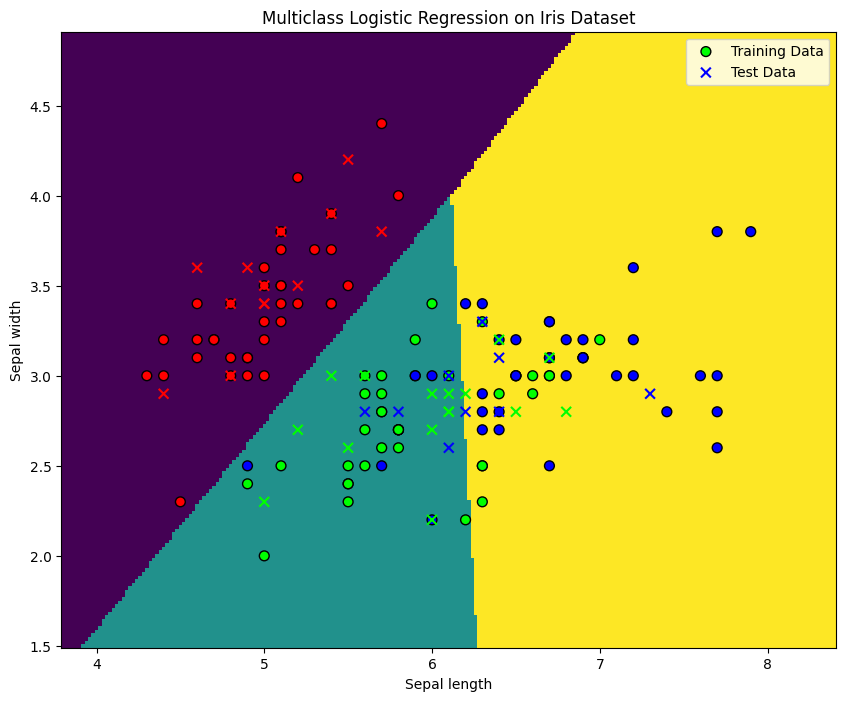

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit the logistic regression model
logreg = LogisticRegression(C=10000, max_iter=100000, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap_bold, marker='o', s=50, label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold, marker='x', s=50, label='Test Data')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Multiclass Logistic Regression on Iris Dataset')
plt.legend()
plt.show()